In [1]:
#!nvidia-smi
!pip install -U albumentations
!pip install tqdm

     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 952kB 14.9MB/s 
     |████████████████████████████████| 38.2MB 1.4MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
import numpy as np
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
from torchvision import models as models
from tqdm.notebook import tqdm

##########onnx export#########

import torch.onnx
import torchvision

###################

import albumentations as A

from google.colab import drive


import random
random.seed(42)

In [3]:
f = open('/content/drive/Shareddrives/ComputerVision/doodleDataset/50classList.txt','r')
categories = []
for l in f.readlines() :
  l = l.strip()
  l = l.replace("_"," ")
  categories.append(l)
f.close()
print(categories)

['alarm clock', 'anvil', 'apple', 'bat', 'bed', 'bucket', 'butterfly', 'camera', 'circle', 'cup', 'diamond', 'dog', 'dolphin', 'eye', 'finger', 'fish', 'flashlight', 'flip flops', 'frog', 'hamburger', 'hand', 'headphones', 'hexagon', 'ice cream', 'keyboard', 'light bulb', 'moon', 'mountain', 'nail', 'octagon', 'owl', 'pants', 'paper clip', 'parachute', 'pencil', 'pig', 'pineapple', 'pizza', 'potato', 'rabbit', 'rainbow', 'sailboat', 'skateboard', 'skull', 'smiley face', 'snake', 'snowflake', 'star', 'sun', 'teapot']


In [4]:
URL_DATA = {}
for category in categories:
  URL_DATA[category] = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' + category +'.npy'

# train_dataset_dict = {}
# test_dataset_dict = {}
all_dataset = {}
for category in categories:
  print("Loading :", category)
  ##### comment if already have dataset #####
  response = requests.get(URL_DATA[category])
  arr = np.load(BytesIO(response.content))
  np.save('/content/drive/Shareddrives/ComputerVision/50ClassDoodleDataset/'+ category +'.npy' , arr)
  ##########
  x =  np.load('/content/drive/Shareddrives/ComputerVision/50ClassDoodleDataset/'+category+'.npy', allow_pickle=True)
  all_dataset[category] = x

Loading : alarm clock
Loading : anvil
Loading : apple
Loading : bat
Loading : bed
Loading : bucket
Loading : butterfly
Loading : camera
Loading : circle
Loading : cup
Loading : diamond
Loading : dog
Loading : dolphin
Loading : eye
Loading : finger
Loading : fish
Loading : flashlight
Loading : flip flops
Loading : frog
Loading : hamburger
Loading : hand
Loading : headphones
Loading : hexagon
Loading : ice cream
Loading : keyboard
Loading : light bulb
Loading : moon
Loading : mountain
Loading : nail
Loading : octagon
Loading : owl
Loading : pants
Loading : paper clip
Loading : parachute
Loading : pencil
Loading : pig
Loading : pineapple
Loading : pizza
Loading : potato
Loading : rabbit
Loading : rainbow
Loading : sailboat
Loading : skateboard
Loading : skull
Loading : smiley face
Loading : snake
Loading : snowflake
Loading : star
Loading : sun
Loading : teapot


# Data Exploration

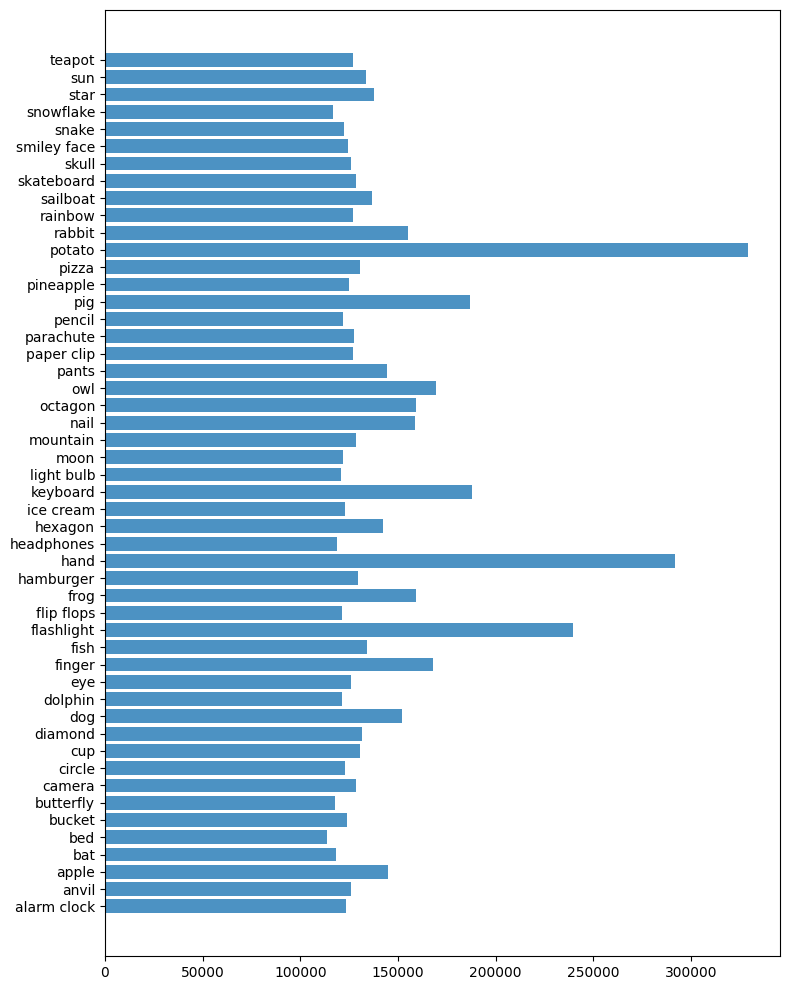

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

'''objects = categories
y_pos = np.arange(len(objects))
performance = [ all_dataset[cat].shape[0] for cat in all_dataset]
width = [1.0 for i in range(50)]
plt.barh(y_pos, performance, align='center' , height= 0.5)
plt.yticks(y_pos, objects)
#plt.axes([0.2,0.1,0.9,0.9])
plt.xlabel('Count')
plt.title('Categories')

plt.show()'''
names = categories

values = [ all_dataset[cat].shape[0] for cat in all_dataset]

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.8)
plt.yticks(yvals,names)
plt.tight_layout()

plt.show()

In [ ]:
print(min(values), max(values))

113862 329204


In [ ]:
med = sorted(values)
print(( med[24] + med[25] )//2)
print(sum(values)/len(values))

128636
143682.58


In [ ]:
int(128636 * 0.85)

109340

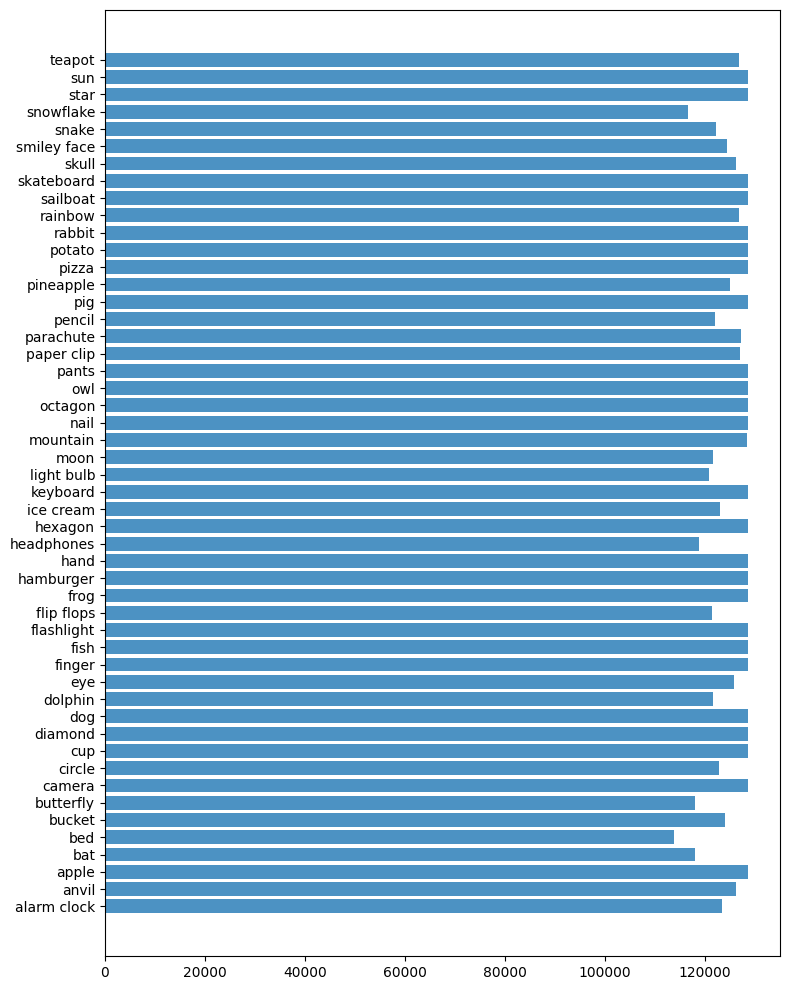

In [ ]:
names = categories

values = [ all_dataset[cat].shape[0] if all_dataset[cat].shape[0] <= 128636 else 128636 for cat in all_dataset]

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.8)
plt.yticks(yvals,names)
plt.tight_layout()

plt.show()

In [ ]:
print(sum(values) * 0.85)

5345879.5


# find some properly preprocessing 

In [5]:
classes_to_index = dict()
for i in range(len(categories)):
  classes_to_index[categories[i]] = i
index_to_class = dict()
for k,v in classes_to_index.items() :
  index_to_class[v] = k

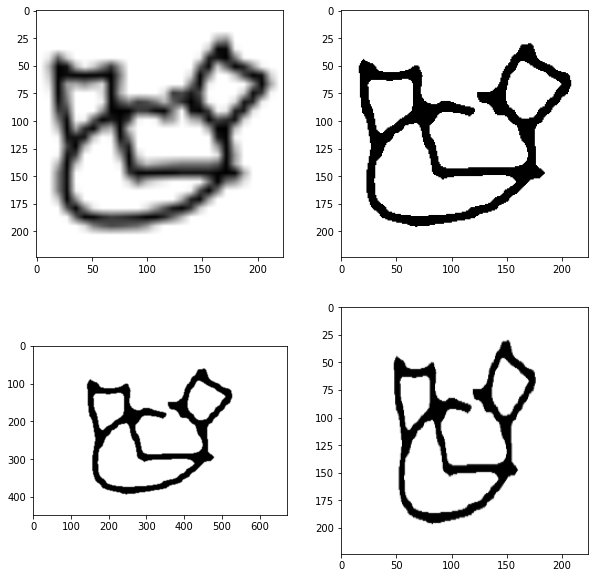

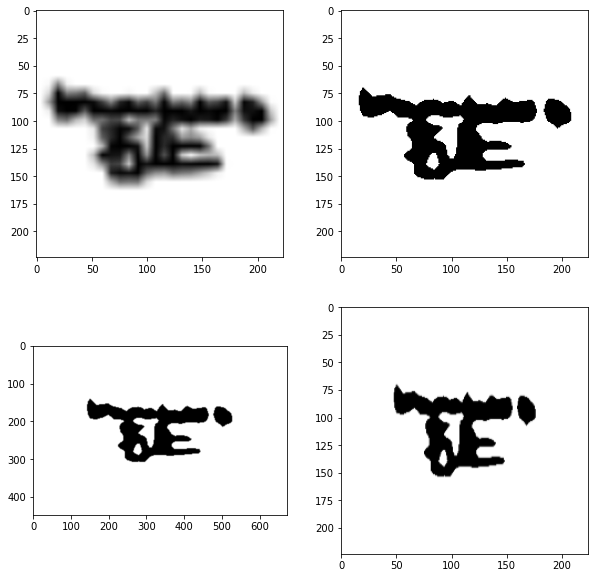

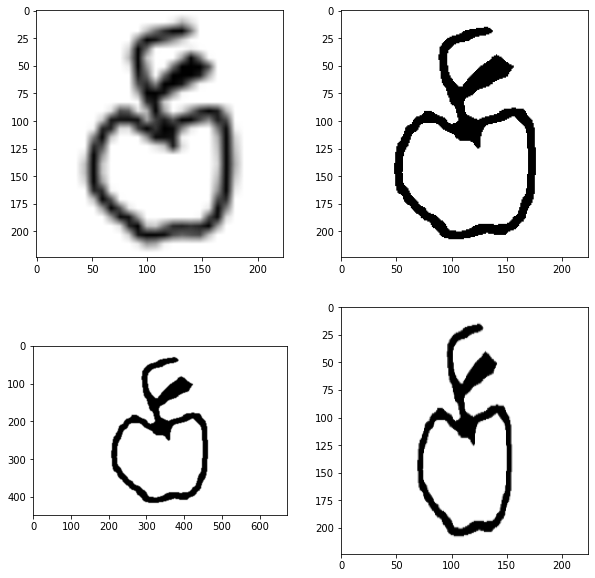

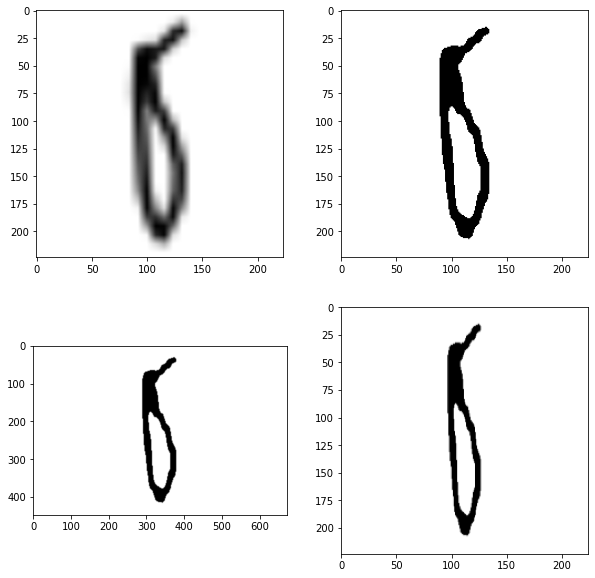

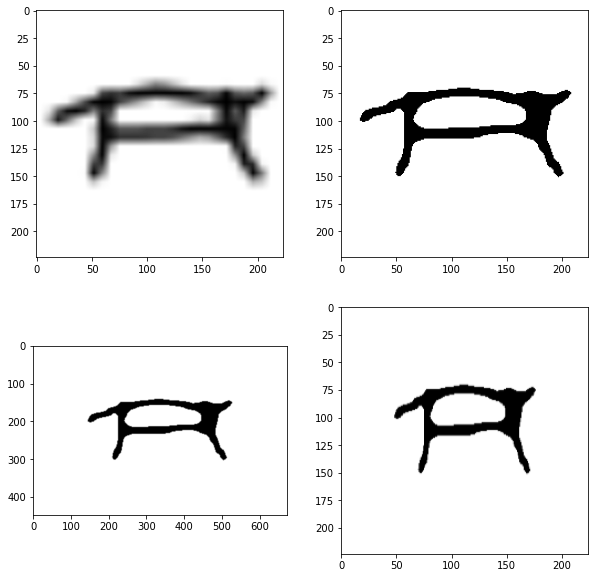

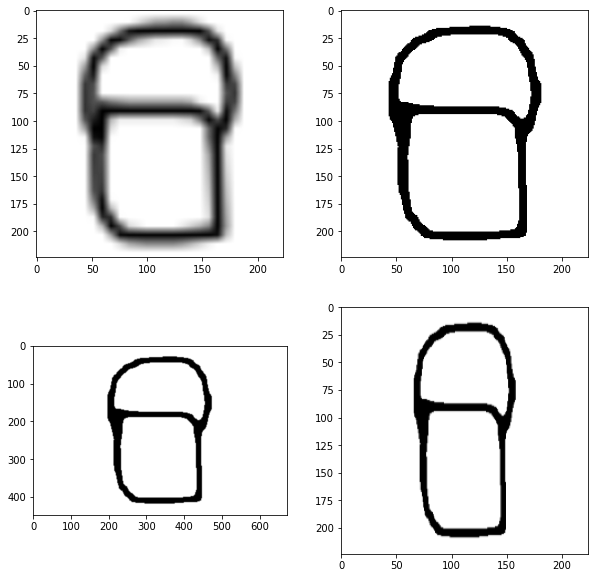

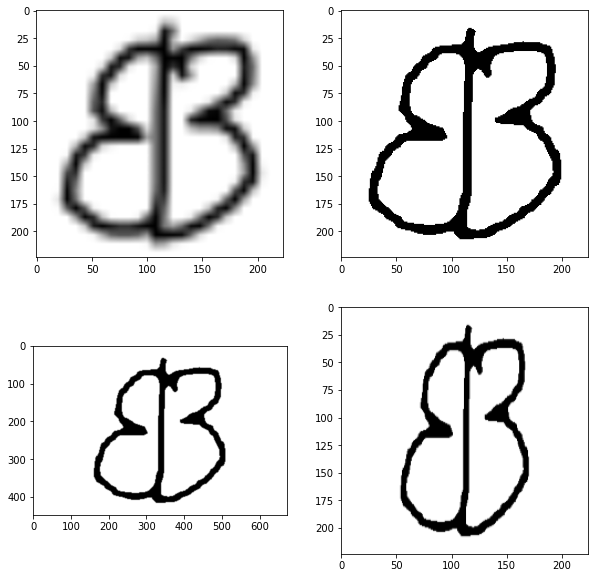

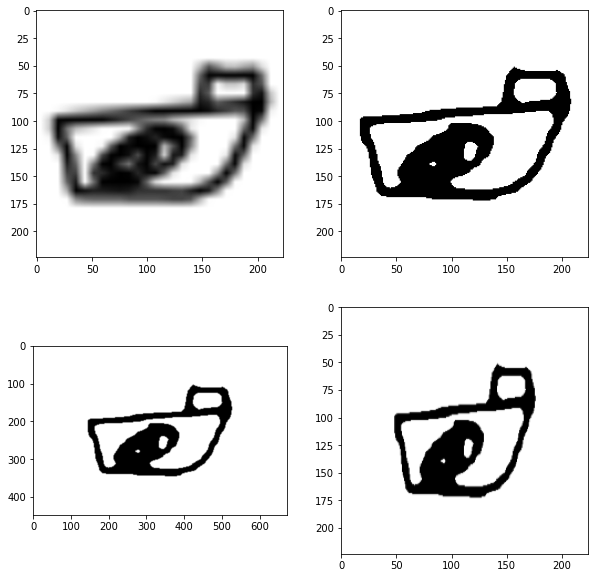

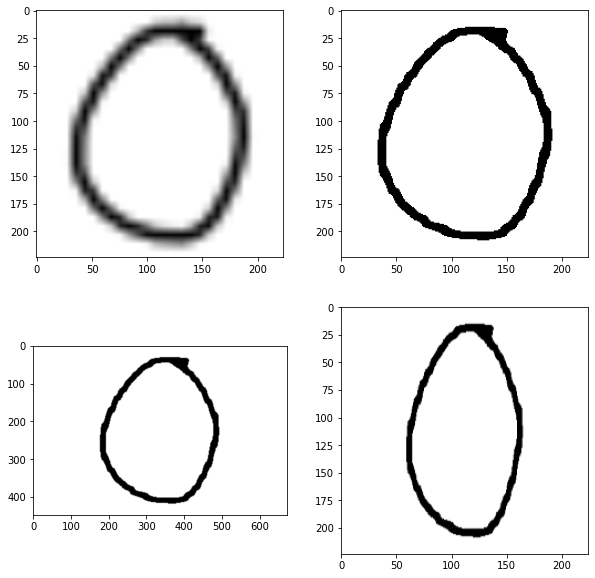

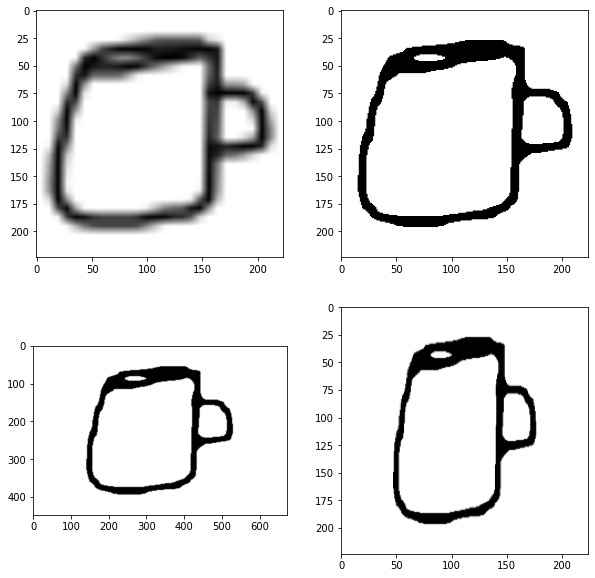

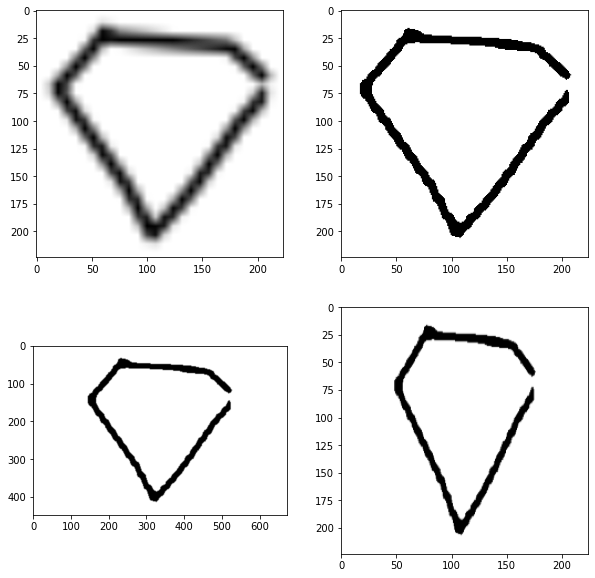

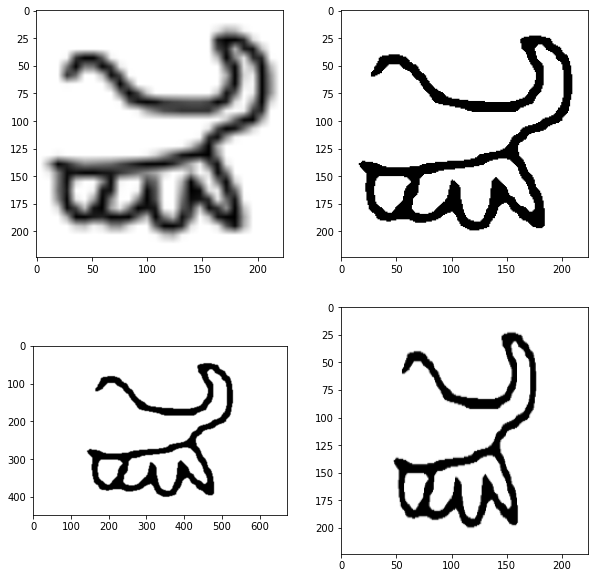

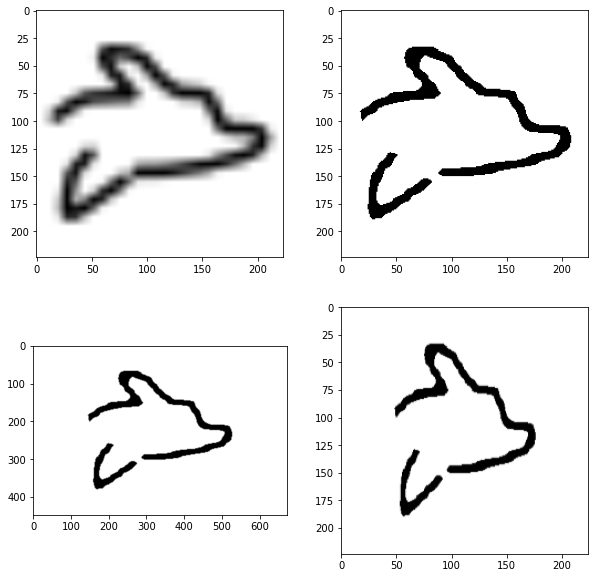

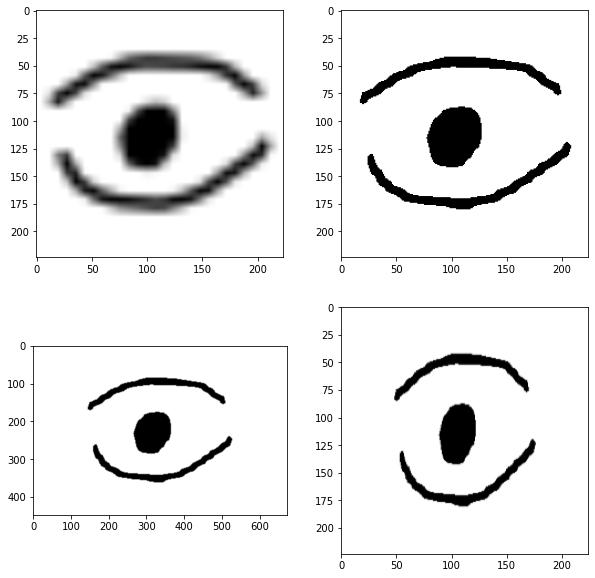

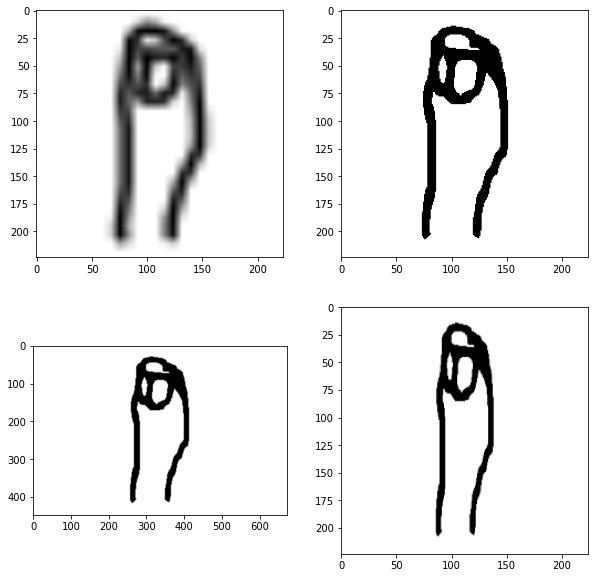

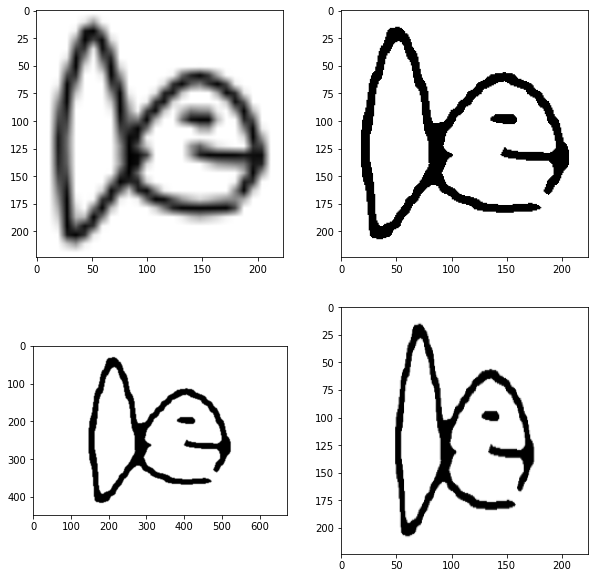

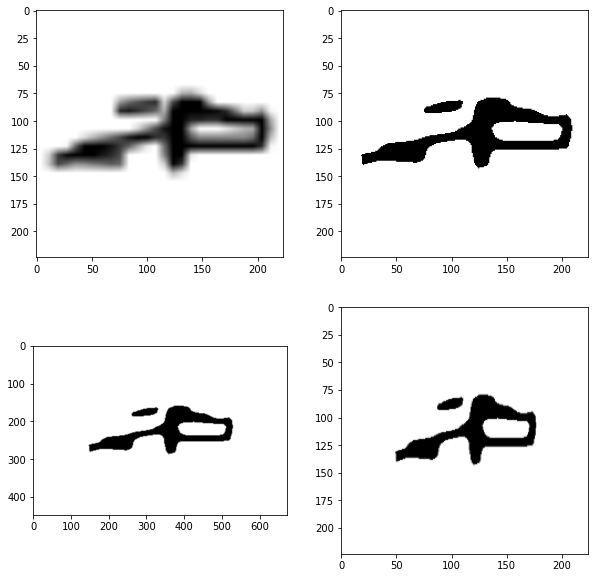

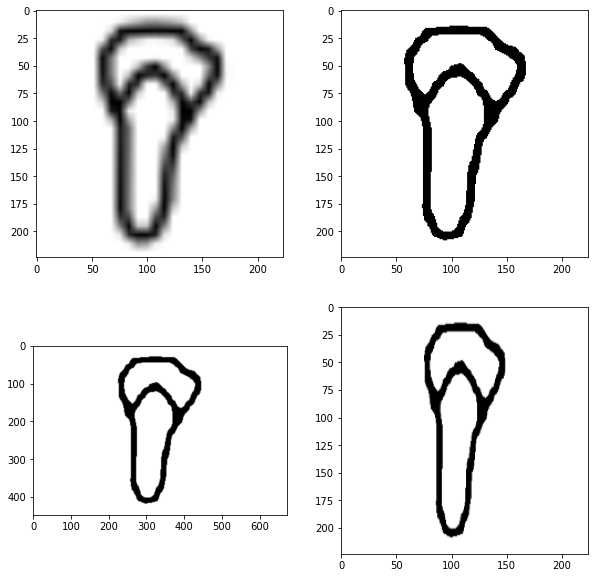

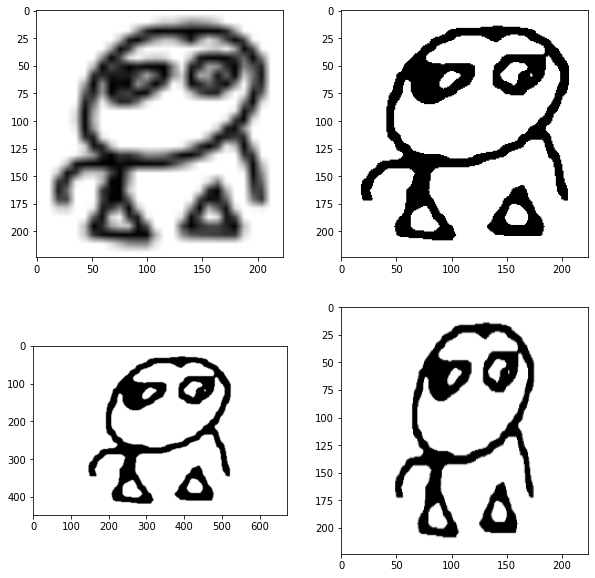

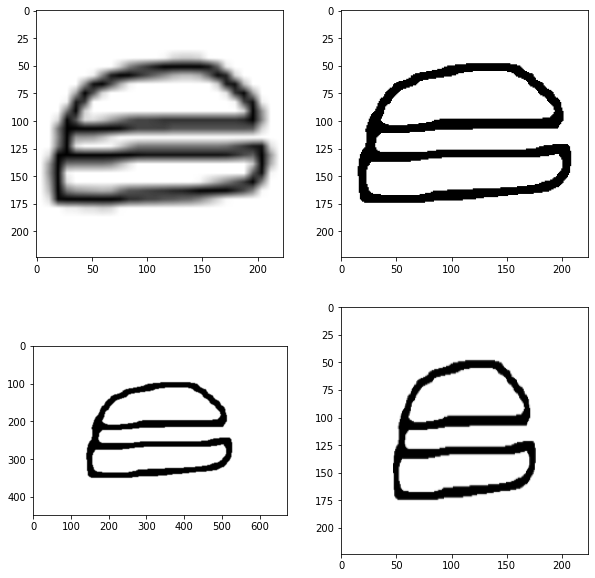

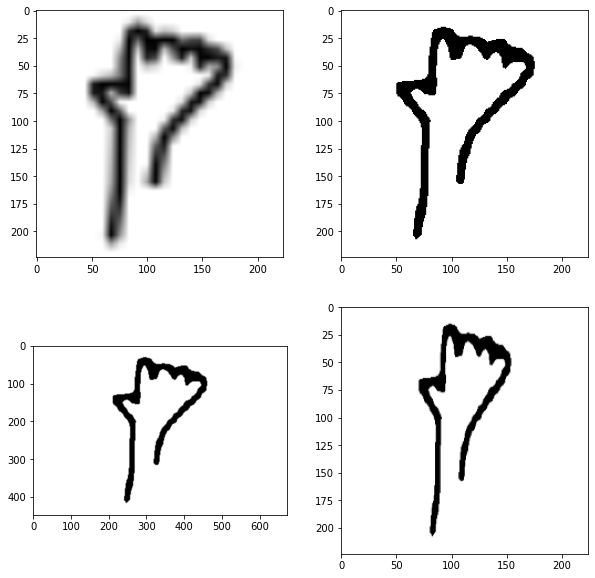

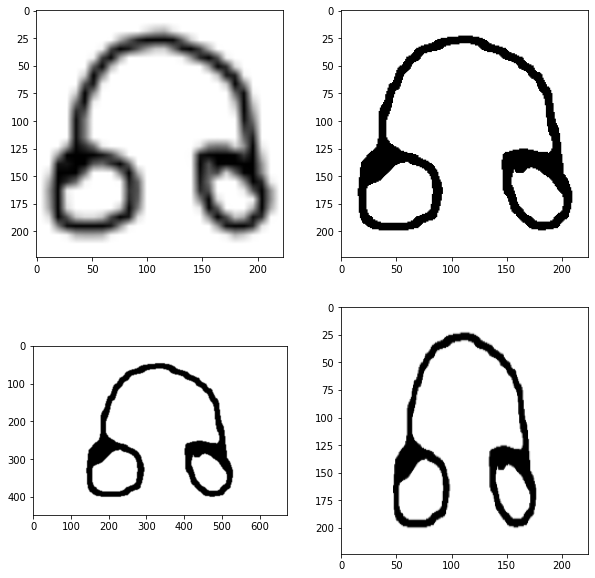

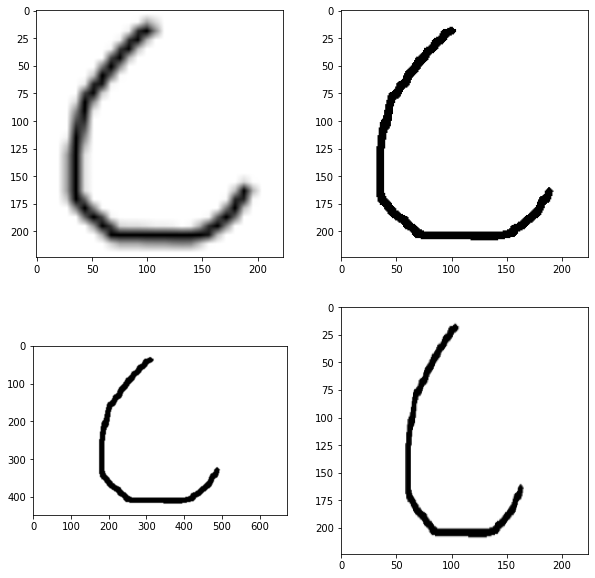

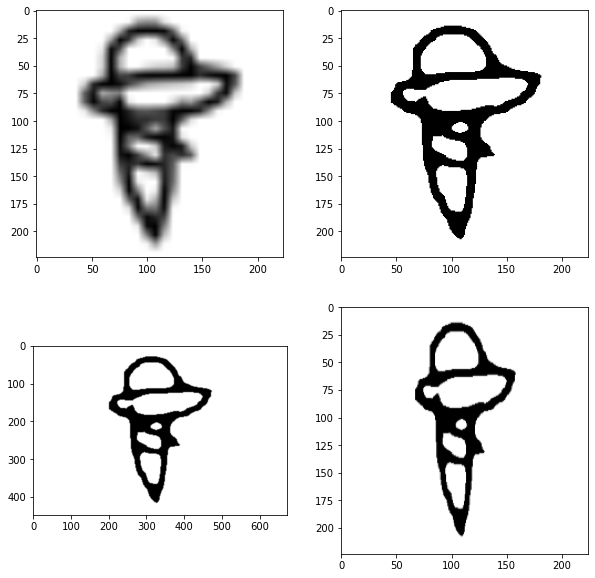

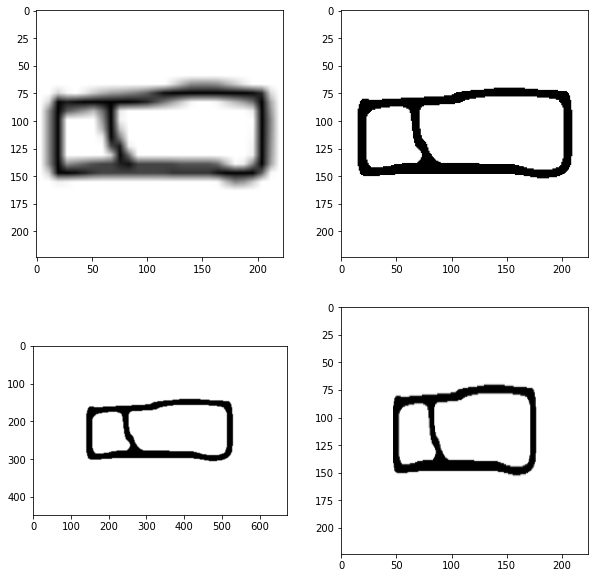

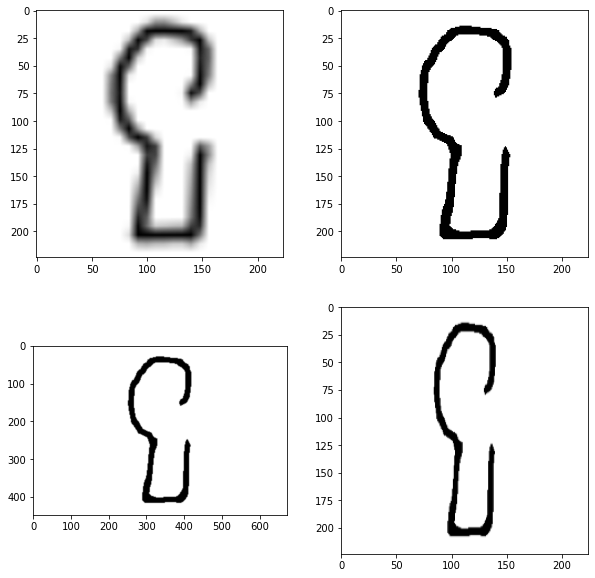

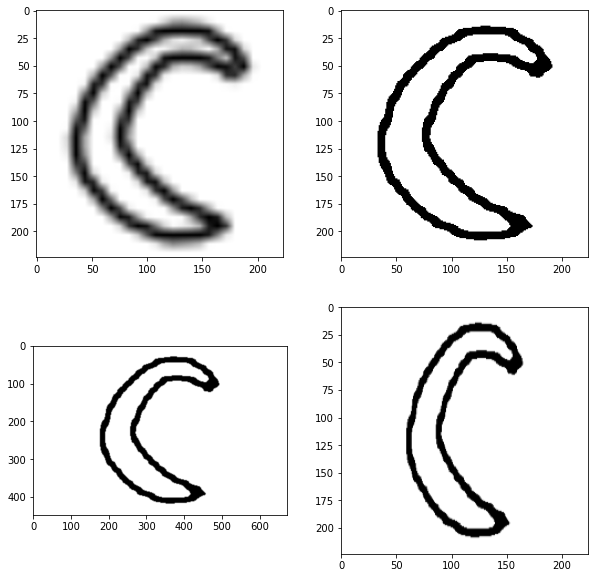

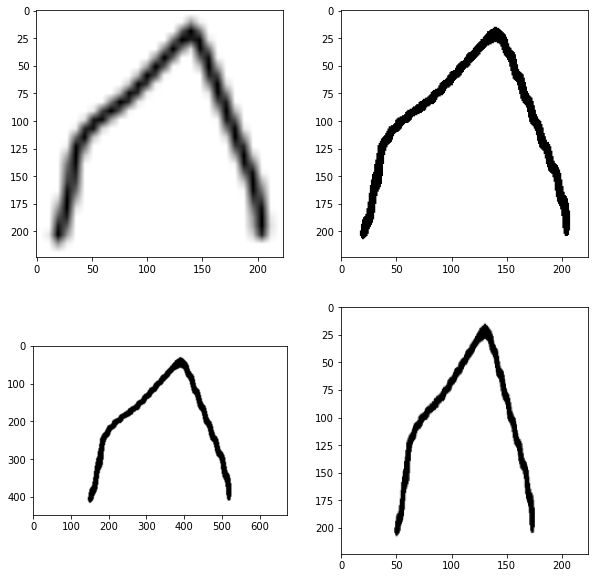

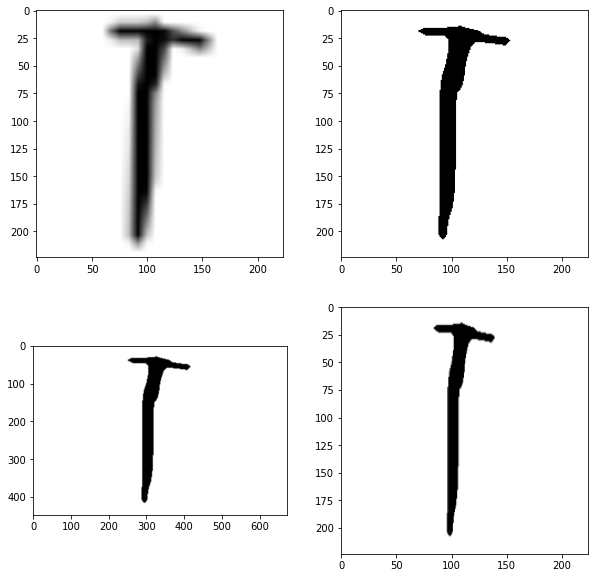

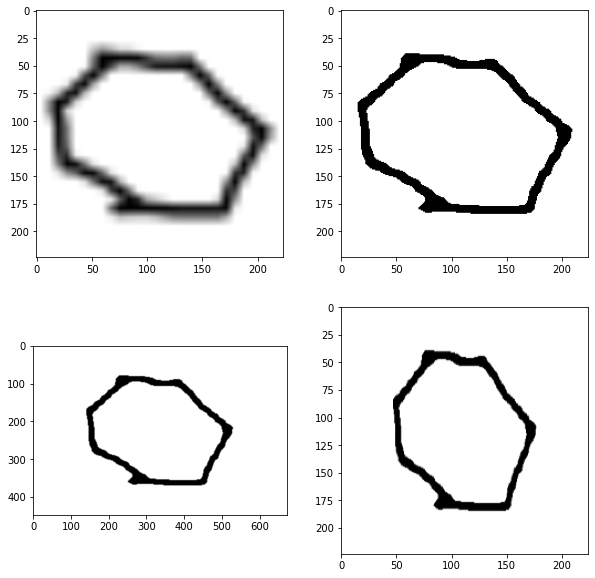

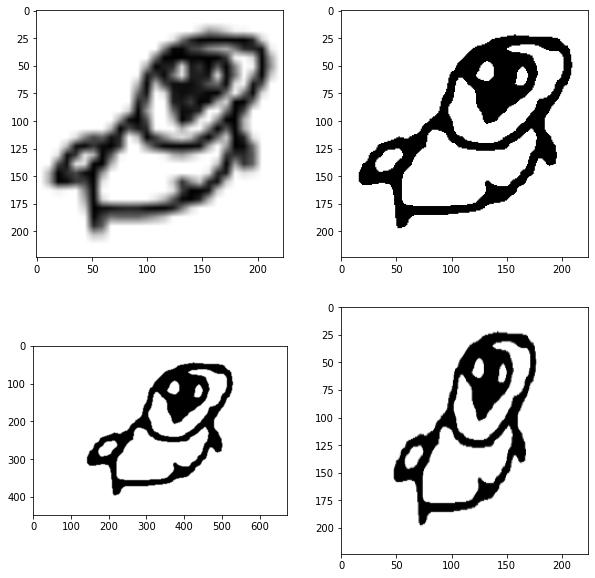

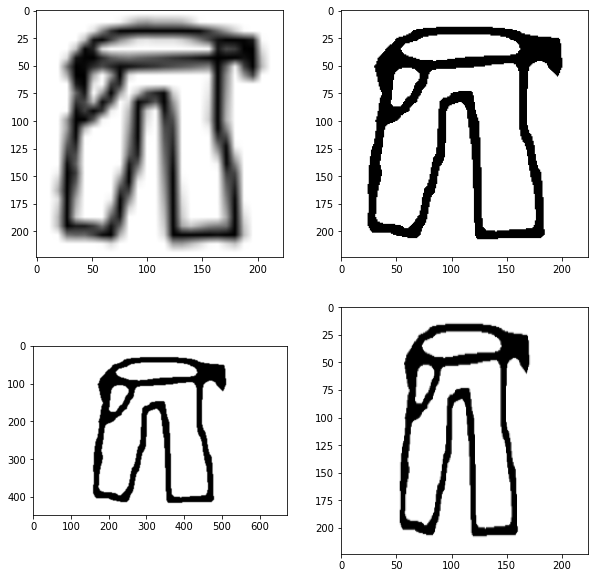

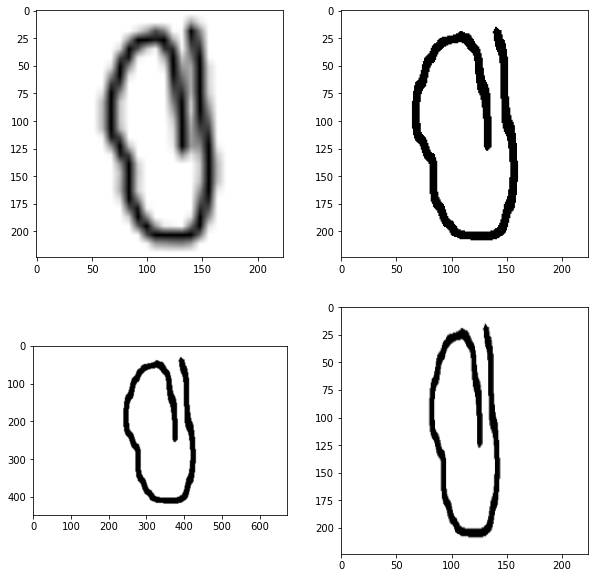

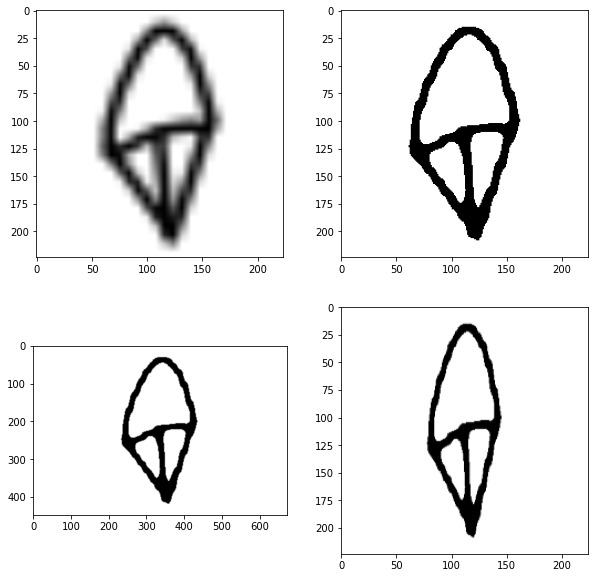

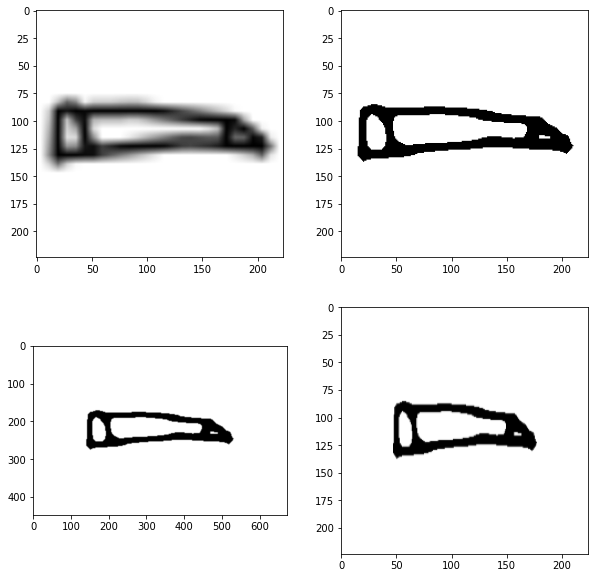

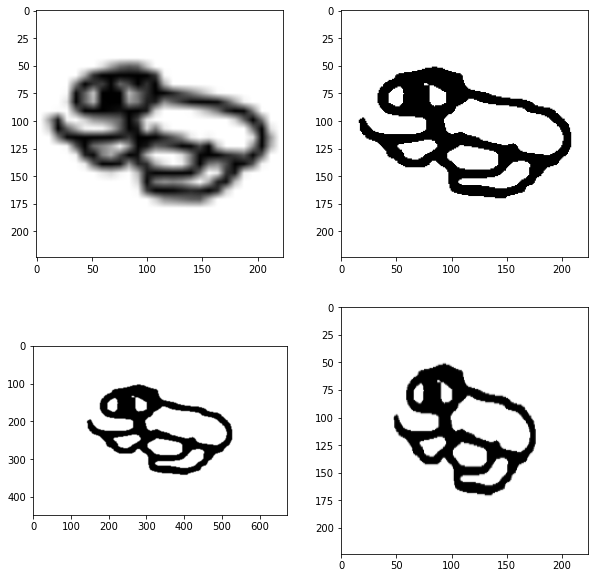

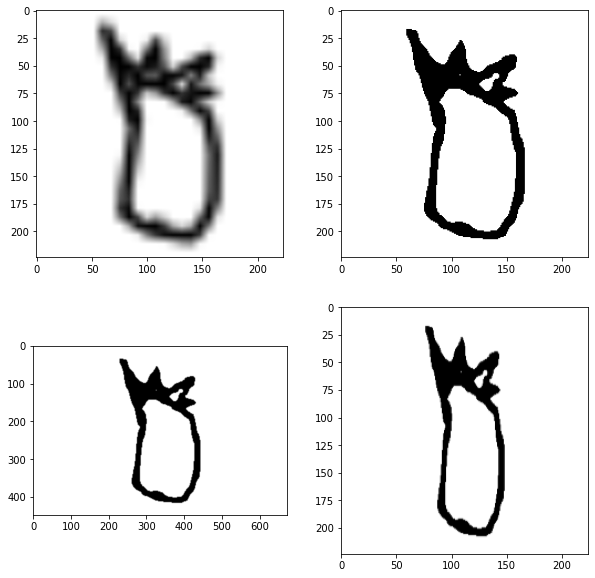

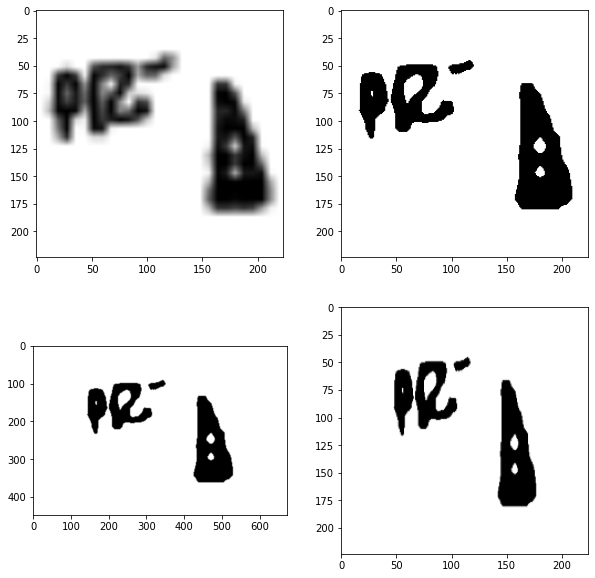

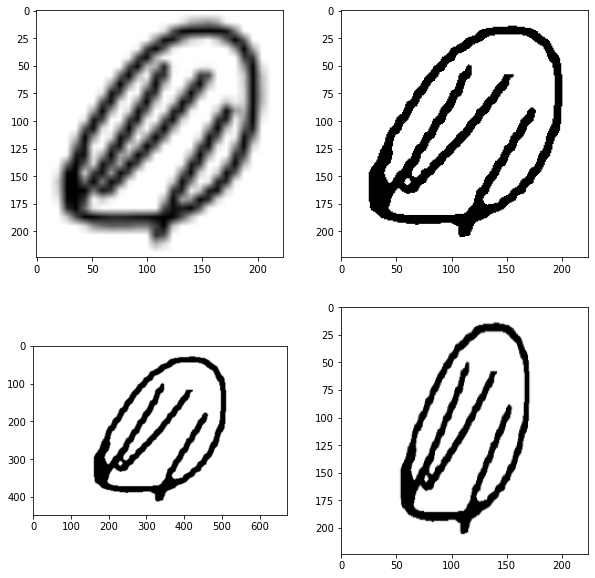

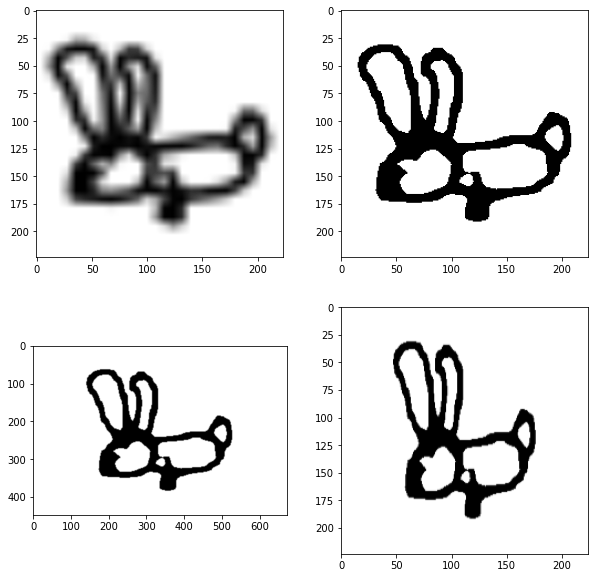

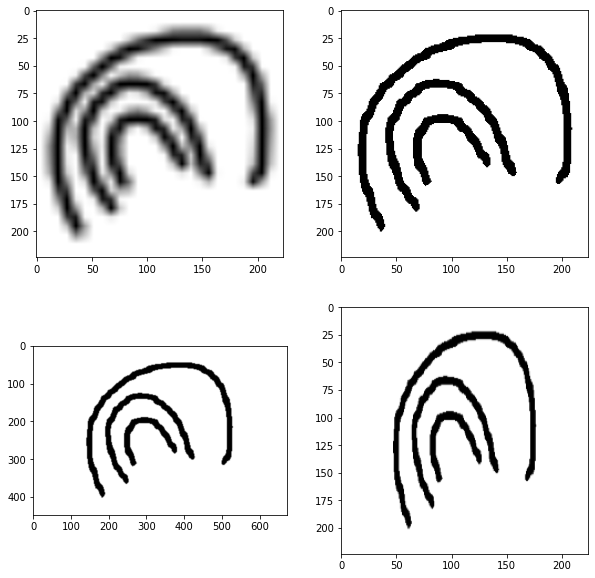

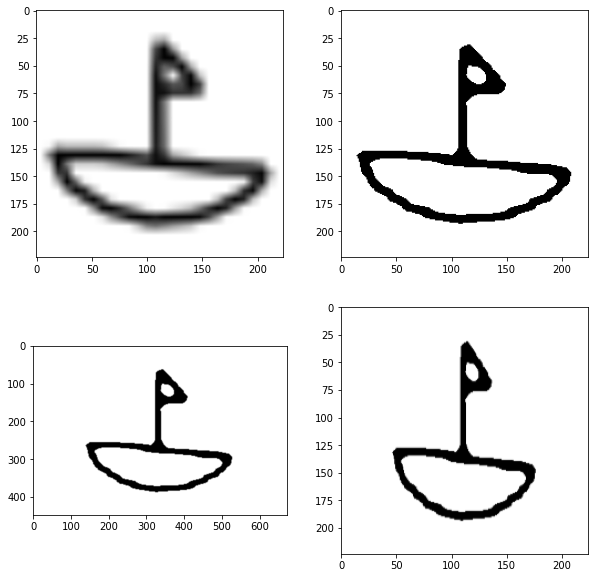

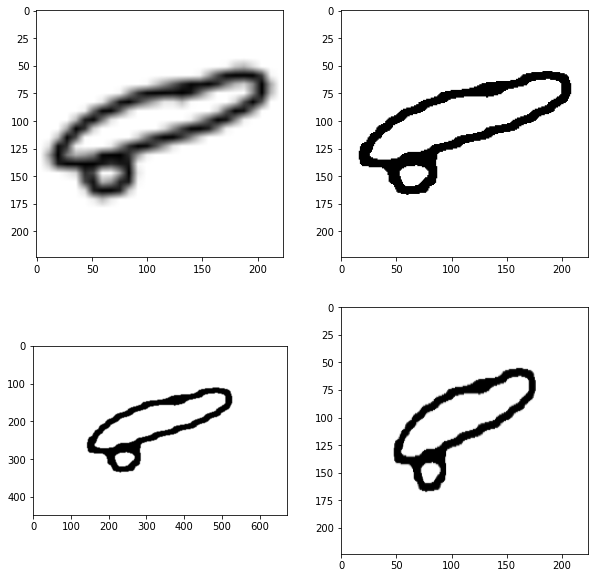

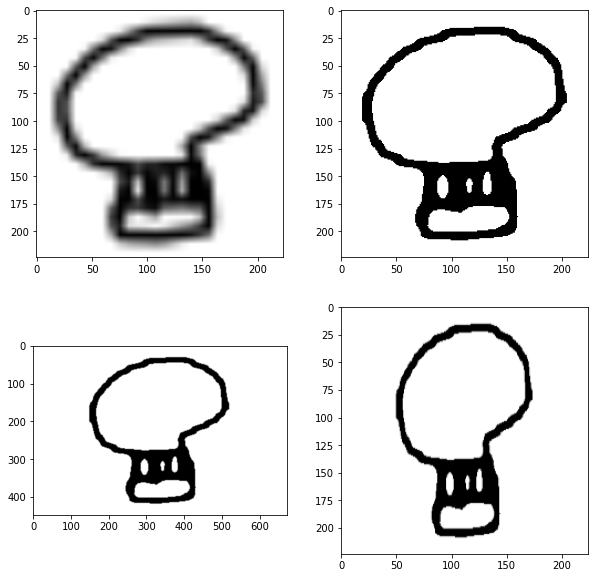

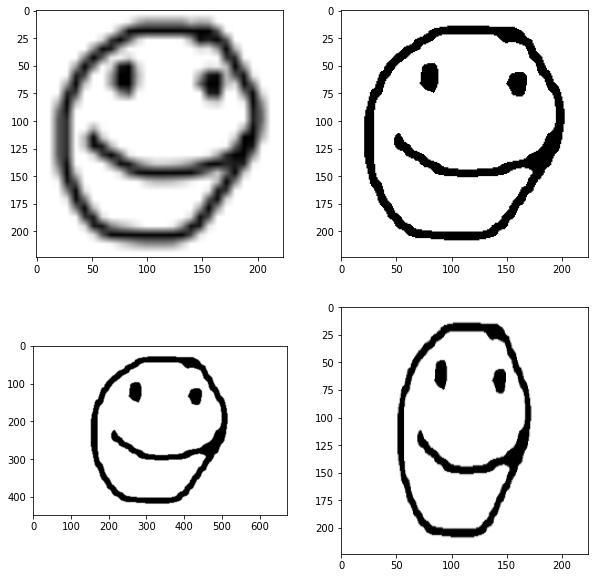

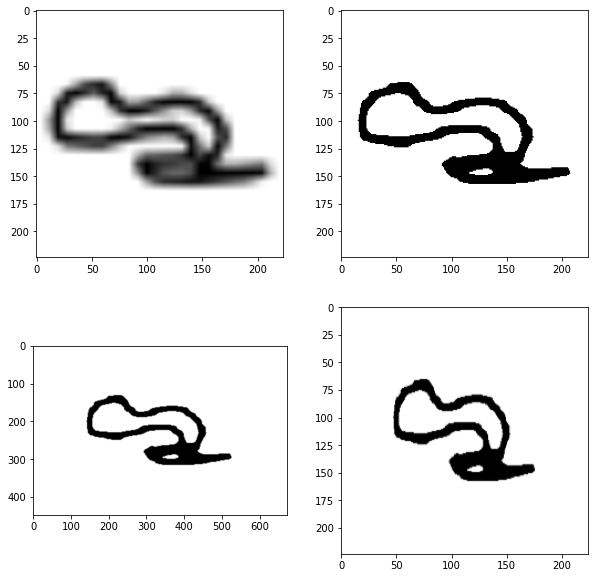

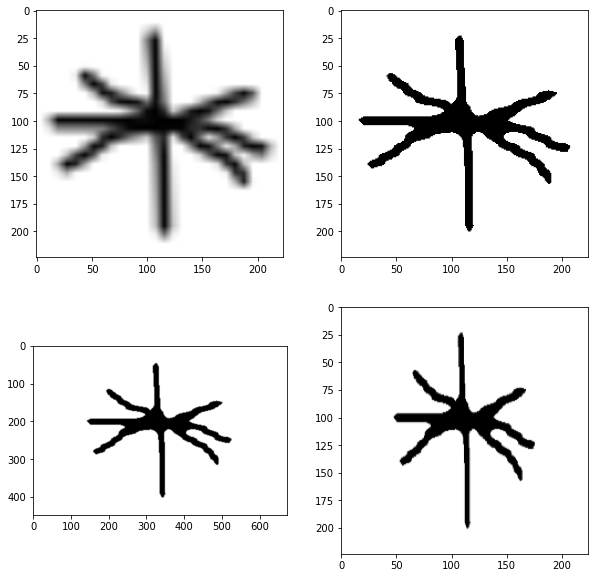

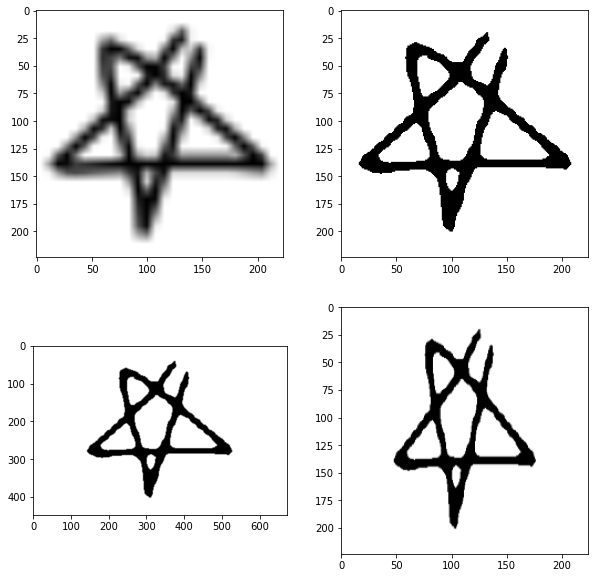

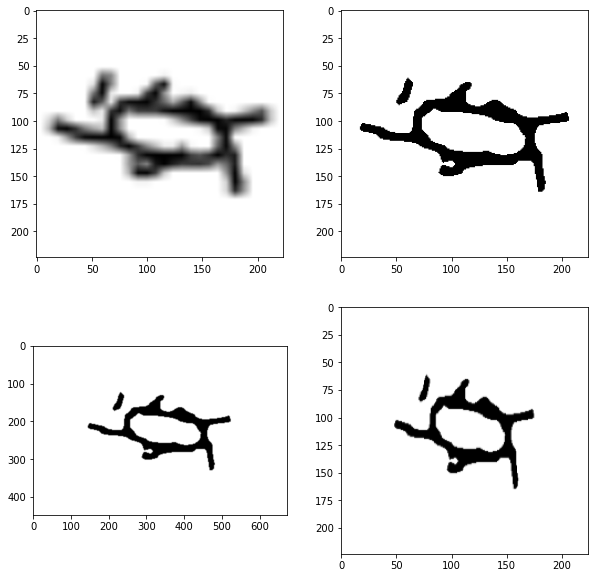

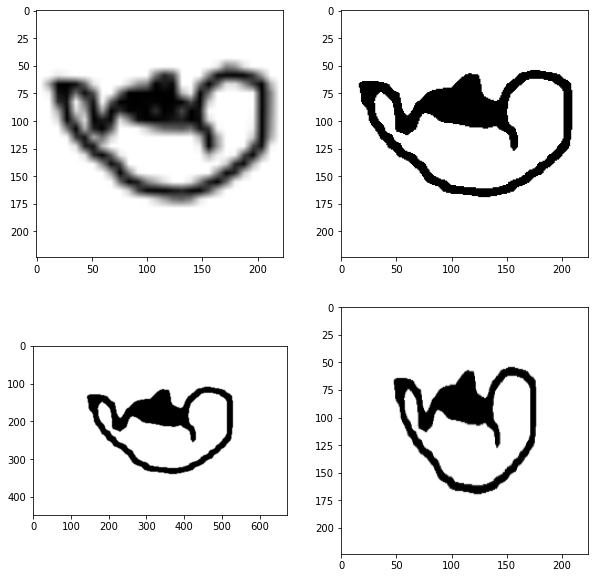

In [7]:
for cat in categories :
  magic_num = [random.randint(0,all_dataset[cat].shape[0]-1) for _ in range(4)]
  sample_img = cv2.bitwise_not(all_dataset[cat][magic_num[0]].reshape((28 , 28)) )
  sample_img = cv2.resize(sample_img, (224,224))

  #experiment something


  ret2,th2 = cv2.threshold(sample_img,85,255,cv2.THRESH_BINARY)



  sample_img2 = cv2.resize(th2, (448,448))


  temp_arr = np.ones((448,672) , dtype=np.uint8)*255
  temp_arr[ :  , 111 : 111+448 ] = sample_img2
  sample_img3 = temp_arr
  #cv2.imwrite(cat + "_sample"+".png" , sample_img3)
  sample_img4 = cv2.resize(temp_arr, (224,224))

  # sample_img2 = train_dataset_dict[cat][magic_num[1]].reshape((28 , 28))
  # sample_img3 = train_dataset_dict[cat][magic_num[2]].reshape((28 , 28))
  # sample_img4 = train_dataset_dict[cat][magic_num[3]].reshape((28 , 28))

  plt.figure(figsize=(10,10))
  plt.subplot(221)
  plt.imshow(sample_img, cmap="gray")
  plt.subplot(222)
  plt.imshow(th2, cmap="gray")
  plt.subplot(223)
  plt.imshow(sample_img3, cmap="gray")
  plt.subplot(224)
  plt.imshow(sample_img4, cmap="gray")
  plt.show()